In [110]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['pdf.fonttype'] = 42  # changes font type so that vector graphics software (i.e. Adobe Illustrator) recognizes text
plt.rcParams['font.family'] = "Arial"  # changes font type to Arial; Illustrator on Windows doesn't work well with default Pyplot font

In [186]:
#import data
#replace the following with path to your data
geotekData = pd.read_csv('/Users/elizabeth/Library/CloudStorage/Box-Box/gly-ekthomas/gly-ekthomas-projects/UB Paleoclimate Group/Thomas Group Research projects/SE Alaska/SEAK Lakes/Tombolo Lake East/24TLE-04/Geotek_24TLE-04/24SEAK_MSCL-XYZ_python.csv',skiprows=[1])

#view the data
geotekData

,Section,Section Depth,Composite depth,Laser Profiler,Magnetic Susceptibility,Greyscale Reflectance,Munsell Colour,CIE X,CIE Y,CIE Z,...,610,620,630,640,650,660,670,680,690,700
0,24SEAK-1A-1N-1-W,6.5,6.5,16.192,-0.331,3.252,3.0YR 1.99/0.39,3.63,3.17,1.03,...,3.31,3.40,3.51,3.61,3.70,3.80,3.94,4.07,4.26,4.46
1,24SEAK-1A-1N-1-W,7.0,7.0,15.558,-0.196,5.824,6.8R 2.79/0.17,6.42,5.74,1.99,...,5.84,5.92,6.01,6.10,6.18,6.27,6.35,6.51,6.66,6.85
2,24SEAK-1A-1N-1-W,7.5,7.5,15.178,-0.461,5.110,7.0YR 2.59/0.35,5.70,5.04,1.64,...,5.22,5.30,5.39,5.54,5.64,5.74,5.83,6.01,6.20,6.38
3,24SEAK-1A-1N-1-W,8.0,8.0,14.958,-0.264,1.068,5.0Y 0.78/0.88,1.24,0.99,0.21,...,1.13,1.24,1.36,1.45,1.55,1.67,1.78,1.94,2.13,2.36
4,24SEAK-1A-1N-1-W,8.5,8.5,14.595,-0.005,1.176,3.9Y 0.86/0.86,1.37,1.10,0.23,...,1.26,1.39,1.44,1.58,1.71,1.82,1.95,2.13,2.32,2.54
5,24SEAK-1A-1N-1-W,9.0,9.0,14.358,-0.398,1.196,3.1Y 0.87/0.84,1.40,1.12,0.23,...,1.28,1.37,1.48,1.62,1.73,1.86,1.99,2.17,2.36,2.61
6,24SEAK-1A-1N-1-W,9.5,9.5,13.897,-0.137,1.210,2.5Y 0.88/0.79,1.40,1.13,0.24,...,1.29,1.39,1.49,1.62,1.73,1.88,2.03,2.16,2.38,2.63
7,24SEAK-1A-1N-1-W,10.0,10.0,13.517,-0.465,1.226,2.6Y 0.89/0.83,1.43,1.15,0.24,...,1.32,1.43,1.55,1.66,1.78,1.89,2.02,2.22,2.41,2.67
8,24SEAK-1A-1N-1-W,10.5,10.5,13.332,-0.463,1.221,2.7Y 0.88/0.85,1.42,1.14,0.23,...,1.30,1.42,1.53,1.64,1.78,1.92,2.07,2.23,2.43,2.70
9,24SEAK-1A-1N-1-W,11.0,11.0,13.062,-0.333,1.252,1.4Y 0.92/0.72,1.45,1.18,0.26,...,1.32,1.45,1.51,1.65,1.75,1.86,2.02,2.18,2.35,2.58


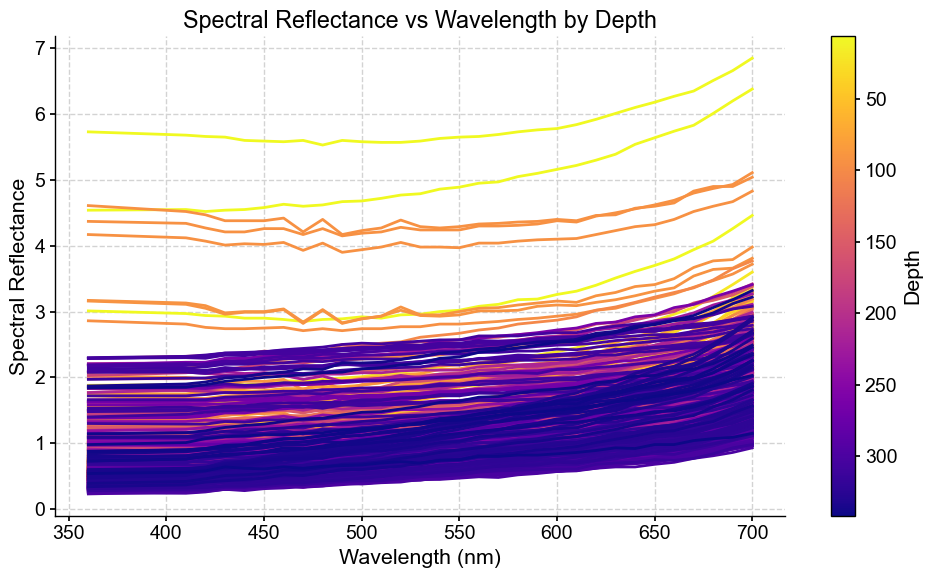

In [187]:
#Plot spectra: wavelength vs reflectance, colored by depth. All data for the core in one plot.
#Sometimes overwhelming and difficult to view patterns down-core, see subsequent plots for detailed visualization.
# Extract the column names for the wavelengths (assumed to be in columns 2 to 32)
wavelengths = geotekData.columns[13:44].astype(float)   # Adjust this if your wavelengths are in different columns
depths = geotekData['Composite depth']  # Assuming 'depth' is in one column

# Get spectral reflectance data
reflectance_data = geotekData.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Assuming reflectance data is from column 1 to 31

# Normalize depth values for color mapping (Viridis colormap)
norm = plt.Normalize(depths.min(), depths.max())
#cmap = cm.viridis
cmap = cm.plasma_r

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each row (depth) as a line, with color based on depth
for i, row in enumerate(reflectance_data):
    plt.plot(wavelengths, row, color=cmap(norm(depths.iloc[i])), lw=2)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, only for colorbar
# Pass the axes 'ax' to colorbar to make sure it is linked correctly
cbar = fig.colorbar(sm, ax=ax, label='Depth')
# Reverse the colorbar ticks (so small values are at the top)
cbar.ax.invert_yaxis()  # This line inverts the direction of the colorbar ticks

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Reflectance')
plt.title('Spectral Reflectance vs Wavelength by Depth')

# Show the plot
plt.tight_layout()
plt.show()

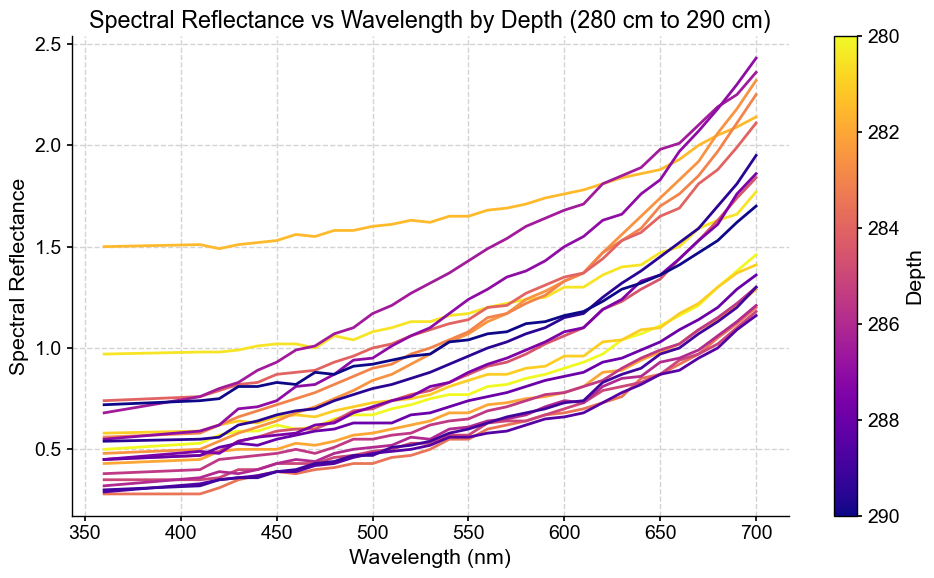

In [196]:
#Plot spectra: wavelength vs reflectance, colored by depth. Choose which depths you wish to view in detail.
# Extract the column names for the wavelengths (adjust based on your data)
wavelengths = geotekData.columns[13:44].astype(float)   # Adjust if your wavelengths are in different columns
depths = geotekData['Composite depth']  # Assuming 'depth' is in one column

# Get spectral reflectance data
reflectance_data = geotekData.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Reflectance data from column 13 to 44

# Define depth range (adjust these as needed)
depth_min = 280  # Define the minimum depth (e.g., 0 cm)
depth_max = 290  # Define the maximum depth (e.g., 50 cm)

# Filter the data based on the depth range
filtered_data = geotekData[(depths >= depth_min) & (depths <= depth_max)]

# Filter the corresponding reflectance data and depths
filtered_depths = filtered_data['Composite depth']
filtered_reflectance_data = filtered_data.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Same column range for reflectance

# Normalize depth values for color mapping (Viridis colormap)
norm = plt.Normalize(filtered_depths.min(), filtered_depths.max())
cmap = cm.plasma_r  # Use the colormap of choice (e.g., plasma, viridis, etc.)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each row (depth) as a line, with color based on depth
for i, row in enumerate(filtered_reflectance_data):
    ax.plot(wavelengths, row, color=cmap(norm(filtered_depths.iloc[i])), lw=2)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, only for colorbar
# Pass the axes 'ax' to colorbar to make sure it is linked correctly
cbar = fig.colorbar(sm, ax=ax, label='Depth')
# Reverse the colorbar ticks (so small values are at the top)
cbar.ax.invert_yaxis()  # This line inverts the direction of the colorbar ticks

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectral Reflectance')
ax.set_title(f'Spectral Reflectance vs Wavelength by Depth ({depth_min} cm to {depth_max} cm)')

# Show the plot
plt.tight_layout()
plt.show()


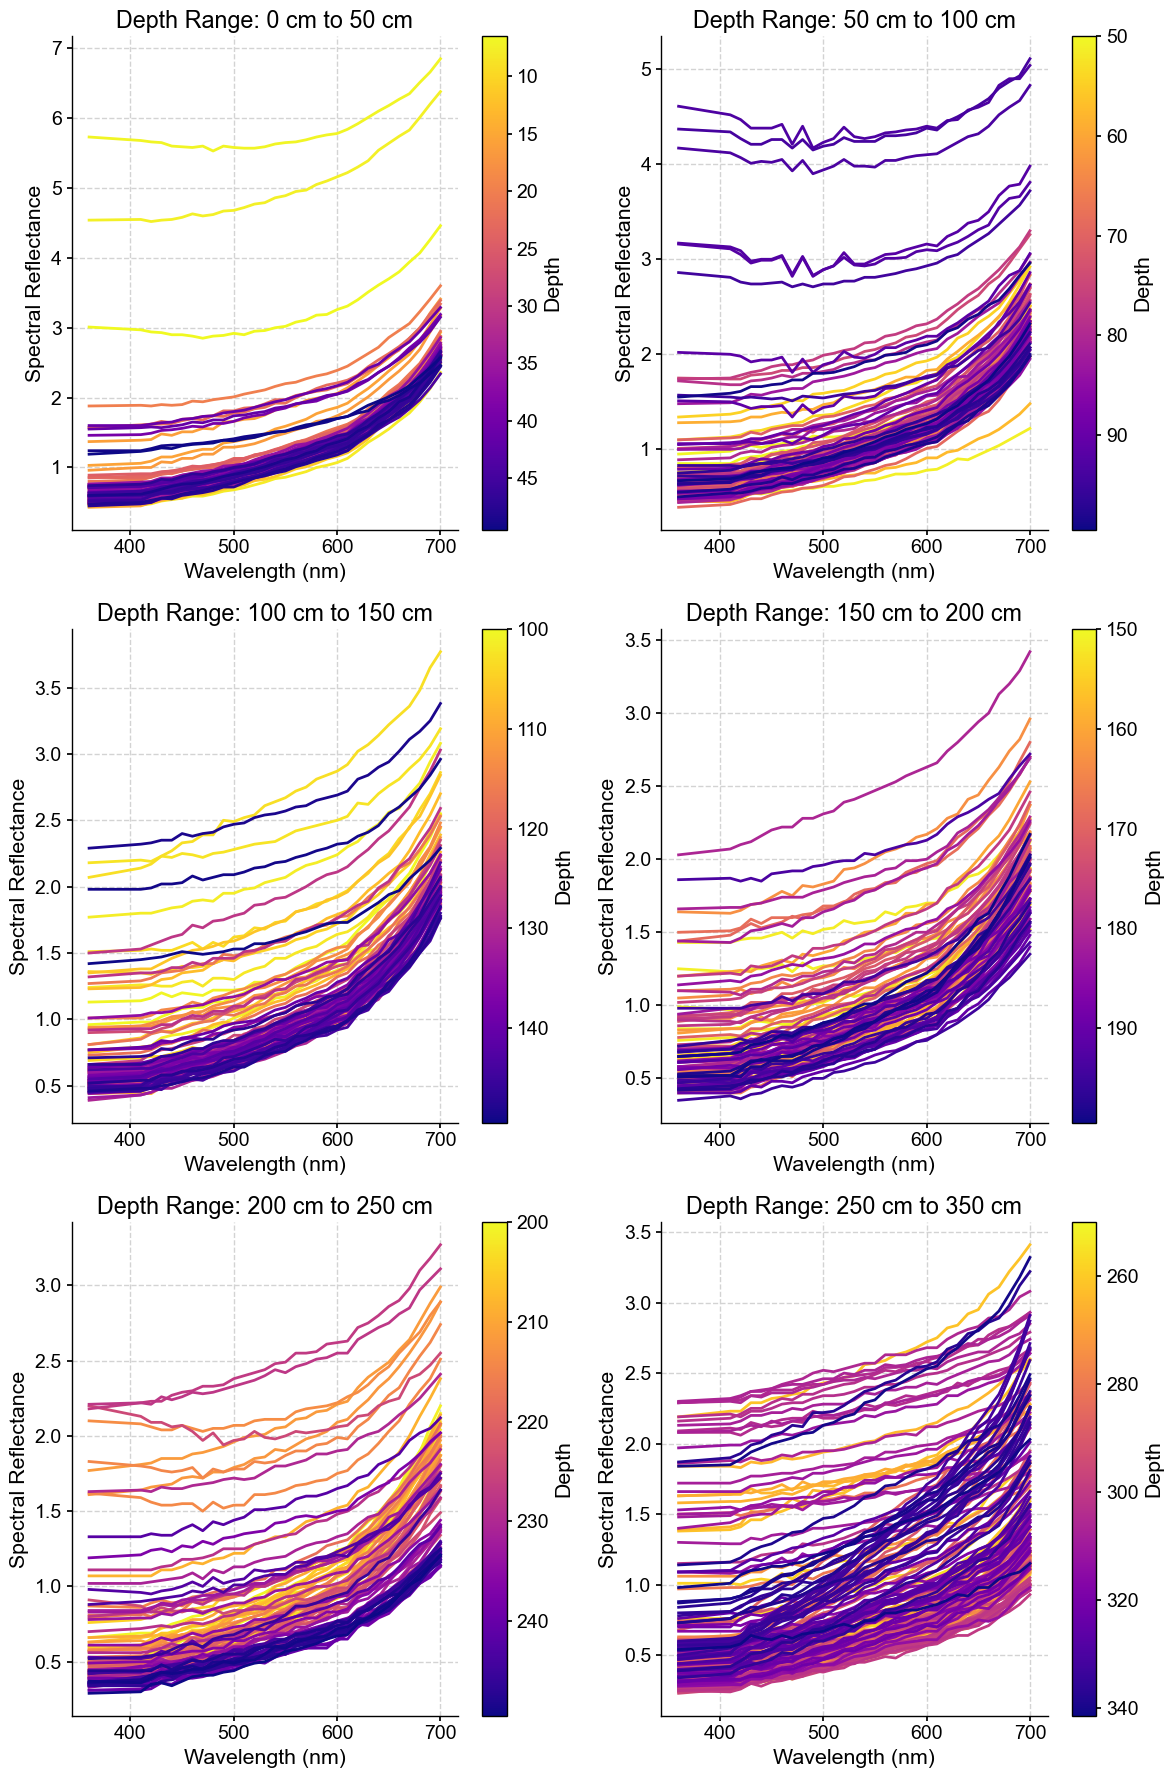

In [189]:
#Plot spectra: wavelength vs reflectance, colored by depth. Create several plots, broken up by depth increments, to aid visualization.
#y-axis on all sub plots different, depending on spectral heights in that depth range.
# Load the data (assuming you already have your dataframe 'geotekData')
# geotekData = pd.read_csv('your_file.csv')  # Load your data if needed

# Extract the column names for the wavelengths (adjust based on your data)
wavelengths = geotekData.columns[13:44].astype(float)   # Adjust if your wavelengths are in different columns
depths = geotekData['Composite depth']  # Assuming 'depth' is in one column

# Get spectral reflectance data
reflectance_data = geotekData.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Reflectance data from column 13 to 44

# Define the depth ranges (in cm)
depth_ranges = [
    (0, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350)
]

# Create the plot with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop over each depth range and corresponding axis
for i, (depth_min, depth_max) in enumerate(depth_ranges):
    # Filter the data based on the depth range
    filtered_data = geotekData[(depths >= depth_min) & (depths < depth_max)]
    
    # Filter the corresponding reflectance data and depths
    filtered_depths = filtered_data['Composite depth']
    filtered_reflectance_data = filtered_data.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Same column range for reflectance
    
    # Normalize depth values for color mapping (Viridis colormap)
    norm = plt.Normalize(filtered_depths.min(), filtered_depths.max())
    cmap = cm.plasma_r  # Use the colormap of choice (e.g., plasma, viridis, etc.)
    
    # Plot each row (depth) as a line, with color based on depth for the current subplot
    for j, row in enumerate(filtered_reflectance_data):
        axes[i].plot(wavelengths, row, color=cmap(norm(filtered_depths.iloc[j])), lw=2)
    
    # Add color bar for each subplot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Empty array, only for colorbar
    cbar = fig.colorbar(sm, ax=axes[i], label='Depth')
    cbar.ax.invert_yaxis()  # This line inverts the direction of the colorbar ticks

    # Add labels and title for each subplot
    axes[i].set_xlabel('Wavelength (nm)')
    axes[i].set_ylabel('Spectral Reflectance')
    axes[i].set_title(f'Depth Range: {depth_min} cm to {depth_max} cm')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

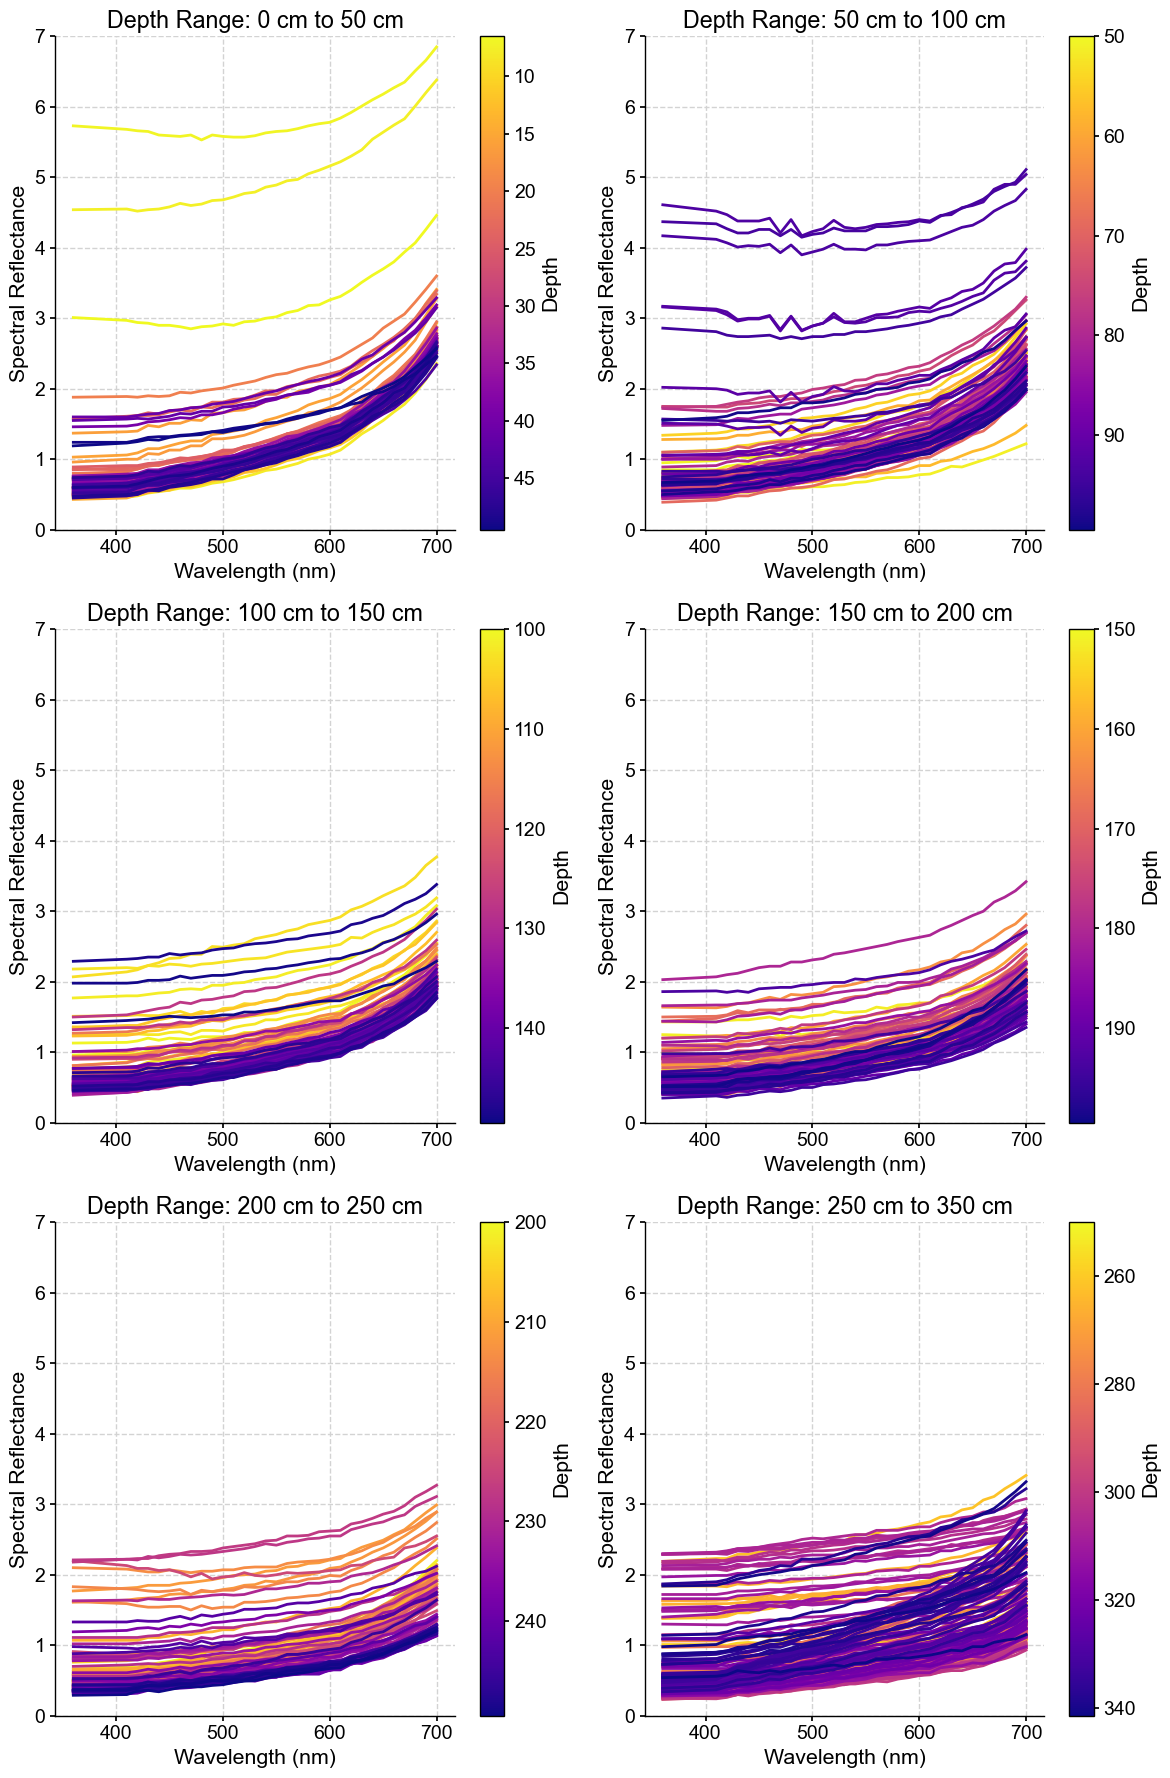

In [190]:
#Plot spectra: wavelength vs reflectance, colored by depth. Create several plots, broken up by depth increments, to aid visualization.
#y-axis on all sub plots the same
# Load the data (assuming you already have your dataframe 'geotekData')
# geotekData = pd.read_csv('your_file.csv')  # Load your data if needed

# Extract the column names for the wavelengths (adjust based on your data)
wavelengths = geotekData.columns[13:44].astype(float)   # Adjust if your wavelengths are in different columns
depths = geotekData['Composite depth']  # Assuming 'depth' is in one column

# Get spectral reflectance data
reflectance_data = geotekData.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Reflectance data from column 13 to 44

# Define the depth ranges (in cm)
depth_ranges = [
    (0, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350)
]

# Create the plot with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define the constant y-axis limits (based on your spectral reflectance data range)
y_min = 0  # Set the minimum value for the y-axis
y_max = 7  # Set the maximum value for the y-axis (adjust based on your data)

# Loop over each depth range and corresponding axis
for i, (depth_min, depth_max) in enumerate(depth_ranges):
    # Filter the data based on the depth range
    filtered_data = geotekData[(depths >= depth_min) & (depths < depth_max)]
    
    # Filter the corresponding reflectance data and depths
    filtered_depths = filtered_data['Composite depth']
    filtered_reflectance_data = filtered_data.iloc[:, 13:44].apply(pd.to_numeric, errors='coerce').values  # Same column range for reflectance
    
    # Normalize depth values for color mapping (Viridis colormap)
    norm = plt.Normalize(filtered_depths.min(), filtered_depths.max())
    cmap = cm.plasma_r  # Use the colormap of choice (e.g., plasma, viridis, etc.)
    
    # Plot each row (depth) as a line, with color based on depth for the current subplot
    for j, row in enumerate(filtered_reflectance_data):
        axes[i].plot(wavelengths, row, color=cmap(norm(filtered_depths.iloc[j])), lw=2)
    
    # Add color bar for each subplot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Empty array, only for colorbar
    cbar = fig.colorbar(sm, ax=axes[i], label='Depth')
    cbar.ax.invert_yaxis()  # This line inverts the direction of the colorbar ticks

    # Add labels and title for each subplot
    axes[i].set_xlabel('Wavelength (nm)')
    axes[i].set_ylabel('Spectral Reflectance')
    axes[i].set_title(f'Depth Range: {depth_min} cm to {depth_max} cm')

    # Set constant y-axis limits across all subplots
    axes[i].set_ylim(y_min, y_max)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [191]:
#Seems like there are several different shapes:
#height above zero of the entire spectrum
geotekData['hgt'] = reflectance_data.mean(axis=1)

#tilt (ie difference between reflectance at 360 and 700)
# Subtract 360 reflectance from 700 reflectance
geotekData['tilt'] = geotekData['700']-geotekData['360']

#You can look at your spectra and develop other indices! There are also many indices in the literature. 

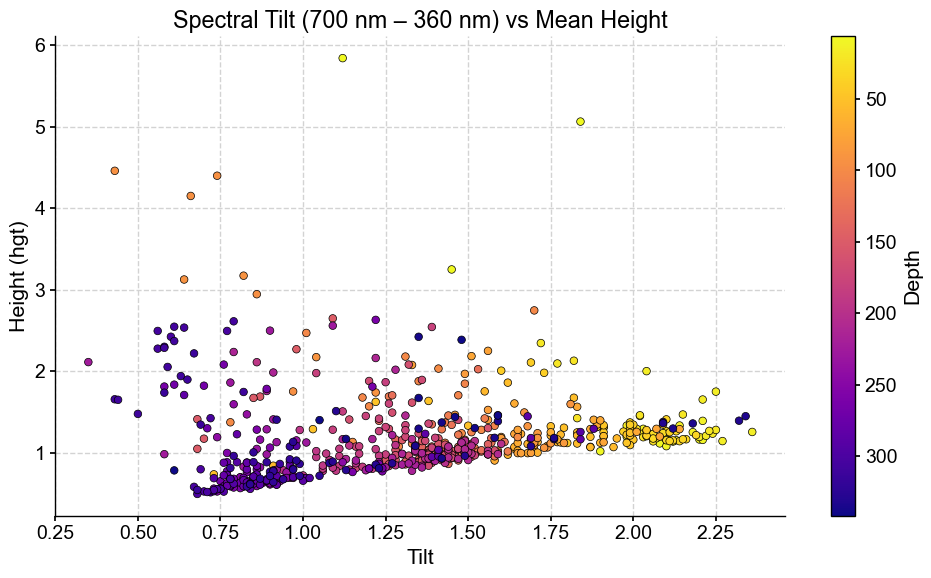

In [192]:
#The following will make a scatter plot of spectrum tilt vs mean height of the spectrum, dots colored by depth.
# Extract data for 'tilt', 'hgt', and 'depth'
tilt = geotekData['tilt']
hgt = geotekData['hgt']
depths = geotekData['Composite depth']

# Normalize depth values for color mapping (using a colormap like 'plasma')
norm = plt.Normalize(depths.min(), depths.max())
cmap = cm.plasma_r  # You can choose any colormap you like (e.g., viridis, plasma, etc.)

# Create the plot (scatter plot)
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with 'tilt' on x-axis, 'hgt' on y-axis, and depth as color
sc = ax.scatter(tilt, hgt, c=depths, cmap=cmap, norm=norm, s=30, edgecolor='k', lw=0.5)

# Add color bar (for depth)
cbar = fig.colorbar(sc, ax=ax, label='Depth')
cbar.ax.invert_yaxis()  # Invert colorbar (optional, to have small depths at the top)

# Add labels and title
ax.set_xlabel('Tilt')
ax.set_ylabel('Height (hgt)')
ax.set_title('Spectral Tilt (700 nm – 360 nm) vs Mean Height')

# Show the plot
plt.tight_layout()
plt.show()


In [193]:
#Calculate chlorophyll trough area (650 to 700 nm)
t0=geotekData['650']*50+((geotekData['700']-geotekData['650'])*50/2)
#-((min(geotekData['650'],geotekData['660'])*10)+(max(geotekData['650'],geotekData['660'])-(min(geotekData['650'],geotekData['660'])*10/2)))
t1=(geotekData[['650','660']].min(axis=1))*10+((geotekData[['650','660']].max(axis=1))-(geotekData[['650','660']].min(axis=1)))*10/2
t2=(geotekData[['660','670']].min(axis=1))*10+((geotekData[['660','670']].max(axis=1))-(geotekData[['660','670']].min(axis=1)))*10/2
t3=(geotekData[['670','680']].min(axis=1))*10+((geotekData[['670','680']].max(axis=1))-(geotekData[['670','680']].min(axis=1)))*10/2
t4=(geotekData[['680','690']].min(axis=1))*10+((geotekData[['680','690']].max(axis=1))-(geotekData[['680','690']].min(axis=1)))*10/2
t5=(geotekData[['690','700']].min(axis=1))*10+((geotekData[['690','700']].max(axis=1))-(geotekData[['690','700']].min(axis=1)))*10/2
geotekData['chlArea'] = t0-(t1+t2+t3+t4+t5)

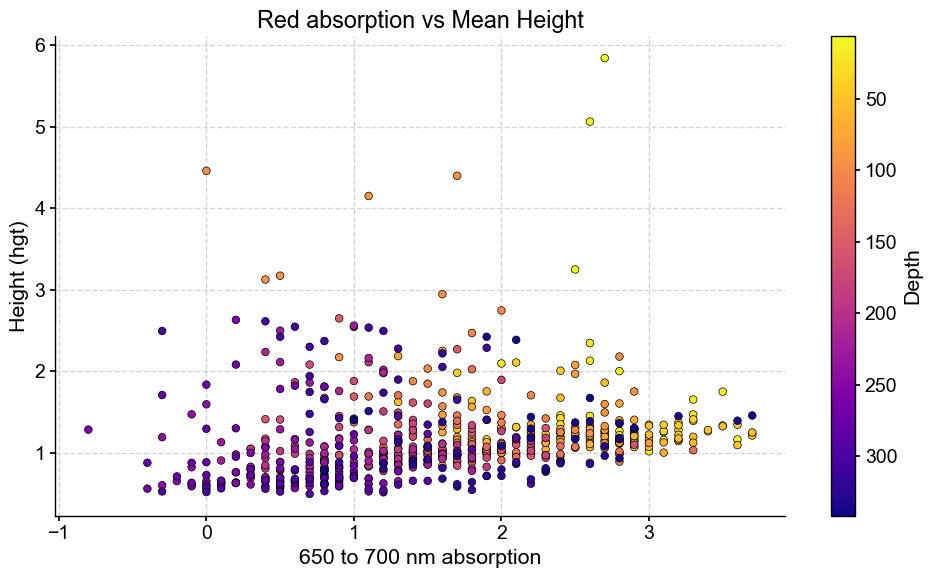

In [194]:
#The following will make a scatter plot of red absorption vs mean height of the spectrum, dots colored by depth.
# Extract data for 'chla', 'hgt', and 'depth'
chl = geotekData['chlArea']
hgt = geotekData['hgt']
depths = geotekData['Composite depth']

# Normalize depth values for color mapping (using a colormap like 'plasma')
norm = plt.Normalize(depths.min(), depths.max())
cmap = cm.plasma_r  # You can choose any colormap you like (e.g., viridis, plasma, etc.)

# Create the plot (scatter plot)
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with 'chl' on x-axis, 'hgt' on y-axis, and depth as color
sc = ax.scatter(chl, hgt, c=depths, cmap=cmap, norm=norm, s=30, edgecolor='k', lw=0.5)

# Add color bar (for depth)
cbar = fig.colorbar(sc, ax=ax, label='Depth')
cbar.ax.invert_yaxis()  # Invert colorbar (optional, to have small depths at the top)

# Add labels and title
ax.set_xlabel('650 to 700 nm absorption')
ax.set_ylabel('Height (hgt)')
ax.set_title('Red absorption vs Mean Height')

# Show the plot
plt.tight_layout()
plt.show()


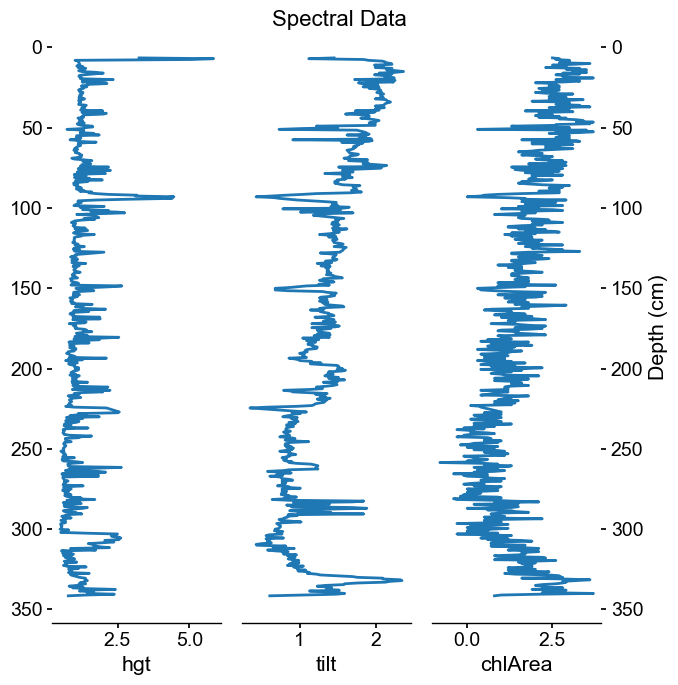

In [195]:
#The following code with make down-core plots of spectral data. In this case, it's plotting the height, tilt, and red absorption.
# Assuming geotekData is your DataFrame and it has at least 3 columns you want to plot on the x-axis
# Let's say the last three columns are the ones you want to plot.

# Extract the last three columns for plotting (assuming they are the last columns in your dataframe)
x_columns = geotekData.columns[-3:]  # The last three columns in the dataframe
depths = geotekData['Composite depth']  # Assuming depth is in the 'Composite depth' column

# Create the plot with 3 subplots (one for each of the last three columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 7), sharey=True)  # 1 row, 3 columns
fig.gca().invert_yaxis()

# Plot each of the last three columns against depth
for i, col in enumerate(x_columns):
    axes[i].plot(geotekData[col], depths, label=col, lw=2)  # Plot x-column vs depth
    axes[i].set_xlabel(col)  # Label x-axis as the column name
    if i == 2:  # Only label y-axis on the last subplot (index 2)
        axes[i].set_ylabel('Depth (cm)')#, labelpad=10)  # Add y-label to the last subplot
        axes[i].yaxis.set_label_position("right")
        axes[i].yaxis.set_ticks_position('right')  # Put the ticks on the right
#     ax.tick_params(axis='y', which='both', length=6)  # Set y-axis ticks length

    #  # Remove y-axis ticks and lines for all subplots except the bottom one
    if i < 2:
         axes[i-2].yaxis.set_ticks_position('none')
         axes[i-2].spines['right'].set_visible(False)

    # # Alternate y-axis ticks and labels left-right-left-right
    # if i % 2 == 0:
    #     axes[i-2].yaxis.tick_left()
    #     axes[i-2].yaxis.set_label_coords(-0.1, 0.5)
    # else:
    #     axes[i-2].yaxis.tick_right()
    #     axes[i-2].yaxis.set_label_coords(1.11, 0.5)

    
    # Remove axis lines (spines) and background grid lines for cleaner plots
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    #axes[i].spines['bottom'].set_visible(False)
    
    # Set axis ticks visible
    #axes[i].tick_params(axis='both', which='both', length=6)  # Set the length of the ticks

    # Remove gridlines in the background
    axes[i].grid(False)

# Set y-axis labels and ticks on the rightmost plot
# for ax in axes:
#     ax.yaxis.set_ticks_position('right')  # Put the ticks on the right
#     ax.tick_params(axis='y', which='both', length=6)  # Set y-axis ticks length

# Add the title for the whole figure
fig.suptitle('Spectral Data', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make space for the title

# Show the plot
plt.show()
